In [62]:
import numpy as np
import scipy.io as io
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cmocean
import xarray as xr

In [2]:
data = io.loadmat('a1203.mat')
## Latitude of interest
target_lat = -62

In [3]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

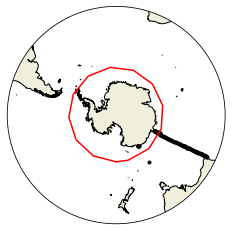

In [4]:
## Plot the lat/lon locations of the stations in the cruise
map_proj = ccrs.SouthPolarStereo()
fig = plt.subplot(111,projection=map_proj)
fig.coastlines(linewidth=1, color='k', resolution='50m')
fig.plot(data['startlon'], data['startlat'], 'k.', transform=ccrs.PlateCarree())
fig.add_feature(cfeature.LAND)
fig.set_boundary(circle, transform=fig.transAxes)
fig.set_extent([-180, 180, -90,-30], crs=ccrs.PlateCarree())
fig.plot([-180,180],[target_lat,target_lat], '-r', transform=ccrs.PlateCarree())
plt.savefig('Fig_1_latlon_locs_cruise.png', bbox_inches='tight', dpi=300)
plt.show()

In [6]:
## Define the section T and S values

T_slice = np.array(data['ctd_temp'])
S_slice = np.array(data['ctd_sal'])
lat_slice = np.array(data['startlat'])
Press_slice = np.array(data['ctd_press'])

In [59]:
## Specify the closest T and S profiles to the target latitude

lat_target = (data['startlat'][0][np.argmin(abs(data['startlat']-target_lat))])
lon_target =(data['startlon'][0][np.argmin(abs(data['startlat']-target_lat))])
time_target = (data['date'][0][np.argmin(abs(data['startlat']-target_lat))])
T_profile = np.array(data['ctd_temp'])[:,np.argmin(abs(data['startlat']-target_lat))]
S_profile = np.array(data['ctd_sal'])[:,np.argmin(abs(data['startlat']-target_lat))]
Press_profile = np.array(data['ctd_press'])[:,np.argmin(abs(data['startlat']-target_lat))]

/jobfs/58864170.gadi-pbs/ipykernel_359430/2937934413.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im1 = axs[0].pcolormesh(lat_slice, Press_slice, T_slice, cmap=cmocean.cm.thermal, vmin=-2,vmax=15)
/jobfs/58864170.gadi-pbs/ipykernel_359430/2937934413.py:13: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im2 = axs[3].pcolormesh(lat_slice, Press_slice, S_slice, cmap=cmocean.cm.haline, vmin=34,vmax=35)
/jobfs/58864170.gadi-pbs/ipykernel_359430/2937934413.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing o

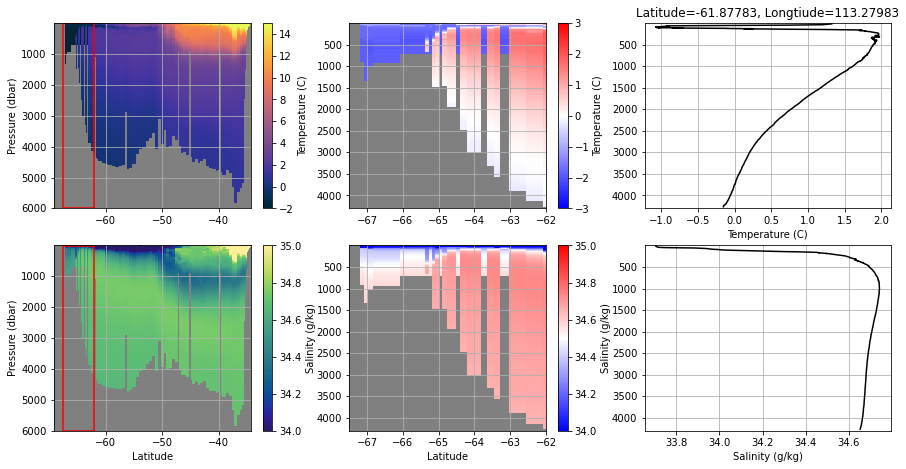

In [63]:
## Plot the entire section, slice in the slope region, and the TS profiles of interest

fig, axs = plt.subplots(2,3, figsize=(20*0.75,10*0.75), facecolor='w', edgecolor='k')#, gridspec_kw={'height_ratios':[1,1,1]})
fig.subplots_adjust(hspace = .2, wspace=0.2)
axs = axs.ravel() 

im1 = axs[0].pcolormesh(lat_slice, Press_slice, T_slice, cmap=cmocean.cm.thermal, vmin=-2,vmax=15)
axs[0].plot([target_lat,target_lat,-67.5,-67.5,target_lat],[6000,10,10,6000,6000], '-r')
axs[0].invert_yaxis()
axs[0].grid()
axs[0].set_facecolor('grey')
cb1 = plt.colorbar(im1,ax=axs[0])
cb1.set_label('Temperature (C)')

im2 = axs[3].pcolormesh(lat_slice, Press_slice, S_slice, cmap=cmocean.cm.haline, vmin=34,vmax=35)
axs[3].plot([target_lat,target_lat,-67.5,-67.5,target_lat],[6000,10,10,6000,6000], '-r')
axs[3].invert_yaxis()
axs[3].grid()
axs[3].set_facecolor('grey')
cb2 = plt.colorbar(im2,ax=axs[3])
cb2.set_label('Salinity (g/kg)')

im3 = axs[1].pcolormesh(lat_slice, Press_slice, T_slice, cmap=plt.cm.bwr, vmin=-3,vmax=3)
axs[1].grid()
axs[1].set_xlim(-67.5,target_lat)
axs[1].set_ylim(2,4300)
axs[1].invert_yaxis()
axs[1].set_facecolor('grey')
cb3 = plt.colorbar(im3,ax=axs[1])
cb3.set_label('Temperature (C)')

im4 = axs[4].pcolormesh(lat_slice, Press_slice, S_slice, cmap=plt.cm.bwr, vmin=34,vmax=35)
axs[4].grid()
axs[4].set_xlim(-67.5,target_lat)
axs[4].set_ylim(2,4300)
axs[4].invert_yaxis()
axs[4].set_facecolor('grey')
cb4 = plt.colorbar(im4,ax=axs[4])
cb4.set_label('Salinity (g/kg)')

axs[2].plot(T_profile, Press_profile, 'k')
axs[2].set_ylim(2,4300)
axs[2].invert_yaxis()
axs[2].set_title('Latitude='+str(lat_target)+', Longtiude='+str(lon_target))
axs[5].plot(S_profile, Press_profile, 'k')
axs[5].set_ylim(2,4300)
axs[5].invert_yaxis()

axs[0].set_ylabel('Pressure (dbar)')
axs[3].set_ylabel('Pressure (dbar)')
axs[3].set_xlabel('Latitude')
axs[4].set_xlabel('Latitude')
axs[2].set_xlabel('Temperature (C)')
axs[5].set_xlabel('Salinity (g/kg)')

axs[2].grid()
axs[5].grid()
plt.savefig('Fig_2_sections_and_profiles.png', bbox_inches='tight', dpi=300)
plt.show()

In [73]:
## Convert the TS profiles into xarray DataArrays and save into netCDF file
T_profile_da = xr.DataArray(data=T_profile, dims={'Pressure'}, coords={'Pressure':Press_profile}, attrs={'lat':lat_target, 'lon':lon_target, 'time':time_target})
S_profile_da = xr.DataArray(data=S_profile, dims={'Pressure'}, coords={'Pressure':Press_profile}, attrs={'lat':lat_target, 'lon':lon_target, 'time':time_target})

ds = xr.Dataset()
ds['T_profile'] = T_profile_da
ds['S_profile'] = S_profile_da
ds.to_netcdf('TS_profiles.nc')